In [1]:
import sys
sys.path.insert(0, r"..//..//")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from hotstepper.utilities.helpers import prepare_datetime
from hotstepper.Steps import Steps

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_temps = pd.read_csv(r'..//..//data//daily-min-temperatures.csv',parse_dates=['Date'])
df_temps.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


<AxesSubplot:>

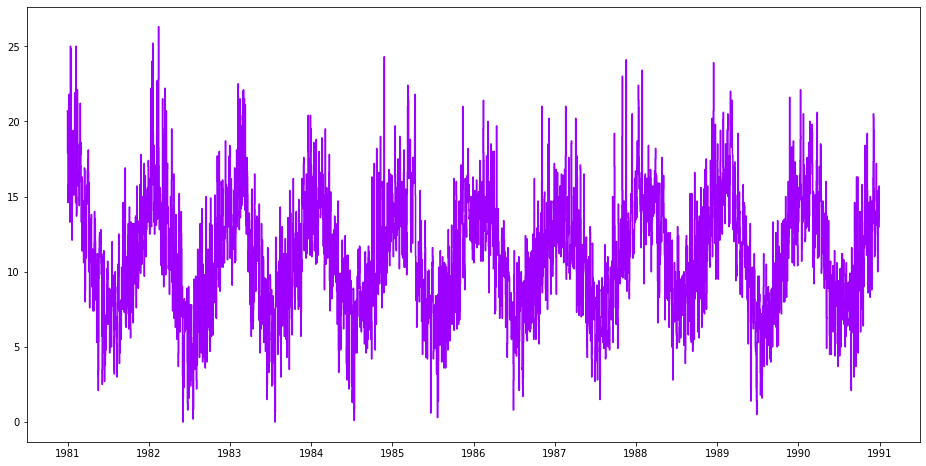

In [3]:
temps_steps = Steps.read_dataframe(df_temps,start='Date',weight='Temp',convert_delta=True)
temps_steps.plot()

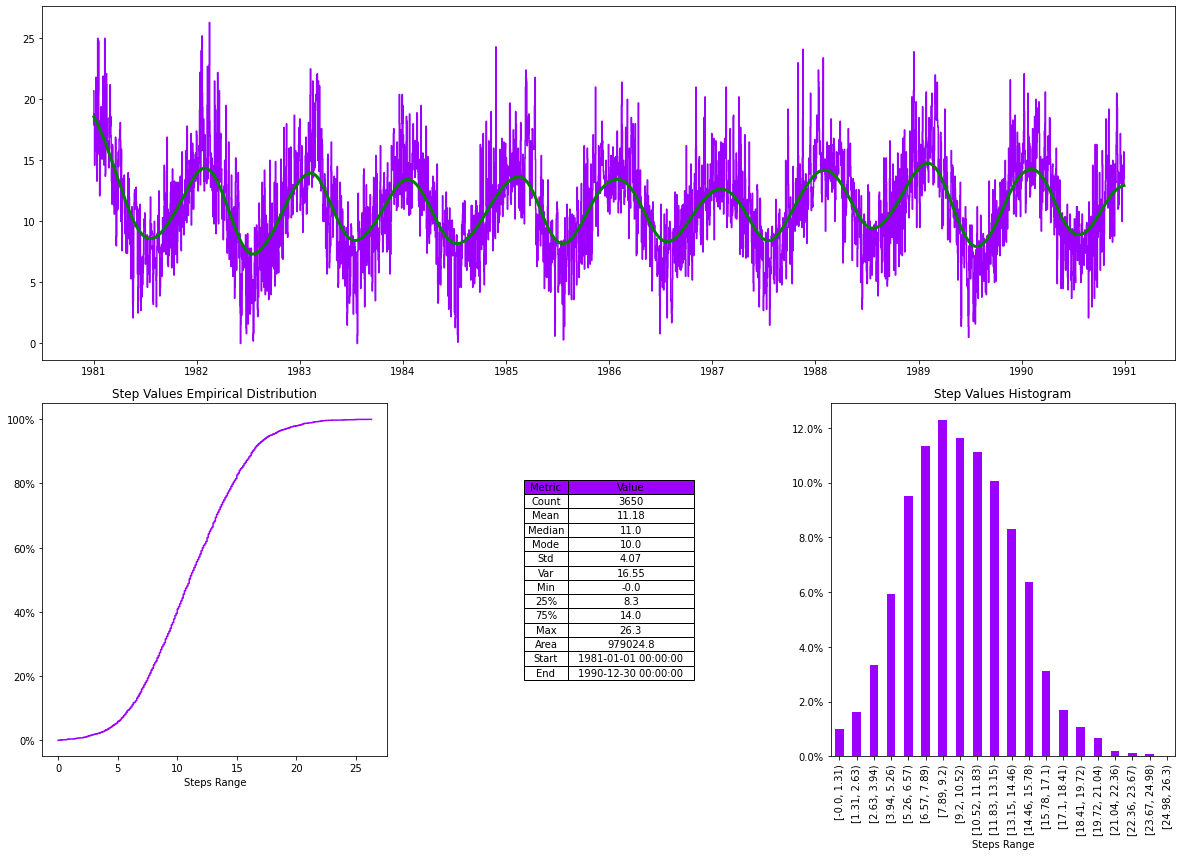

In [4]:
temps_steps.summary();

<AxesSubplot:title={'center':'Steps Partial Autocorrelation for Lags = 10'}, xlabel='Lag'>

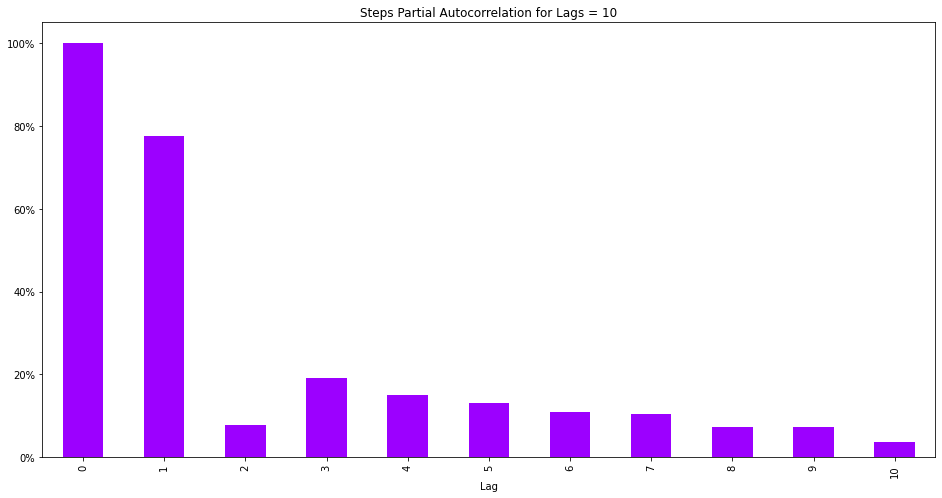

In [5]:
temps_steps.pacf_plot()

How often was it over 20 degrees?

1752.0 87600.0 0.02


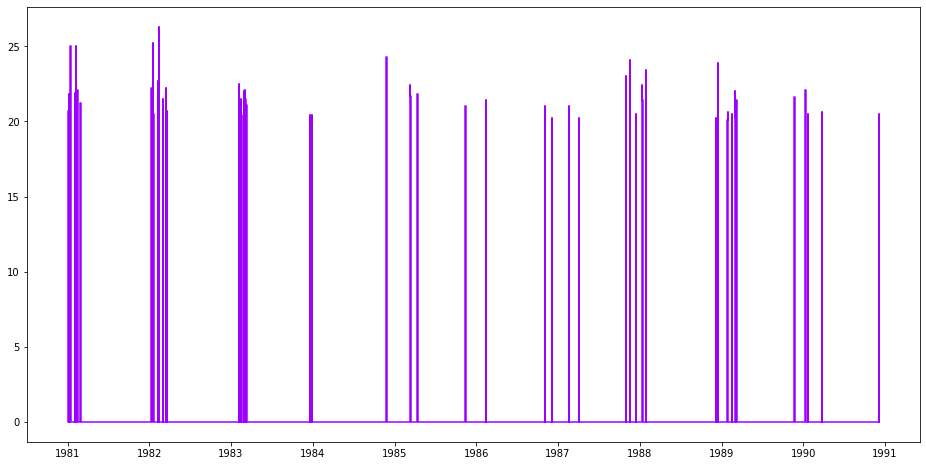

In [6]:
(temps_steps>20).plot()
si20 = (temps_steps>20).normalise().integrate()
sitot = temps_steps.normalise().integrate()
print(si20,sitot,(si20)/sitot)


In [7]:
temps_steps_1982 = temps_steps.clip(lbound=pd.Timestamp(1982,1,1),ubound=pd.Timestamp(1982,12,31))
#temps_steps_1982.normalise().plot()

In [8]:
df_temps[df_temps.Temp > 20]

,Date,Temp
0,1981-01-01,20.7
8,1981-01-09,21.8
13,1981-01-14,21.5
14,1981-01-15,25.0
15,1981-01-16,20.7
...,...,...
3295,1990-01-11,22.1
3308,1990-01-24,20.5
3370,1990-03-27,20.6
3623,1990-12-05,20.5


In [9]:
df_temps.shape

(3650, 2)

In [10]:
74/3650

0.020273972602739727